In [1]:
%pylab inline

import pandas as pd
from glob import glob
from sklearn.model_selection import train_test_split

from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
# To stop potential randomness
seed = 42
rng = np.random.RandomState(seed)

In [3]:
data = pd.read_csv('../datasets/emergency_classification/emergency_classification.csv')

In [4]:
emergency_vehicles = glob('../datasets/emergency_classification/images/Emergency/*.jpg')
nonemergency_vehicles = glob('../datasets/emergency_classification/images/Non-Emergency/*.jpg')

In [5]:
len(emergency_vehicles), len(nonemergency_vehicles)

(991, 1361)

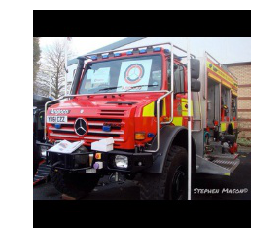

In [6]:
img_name = rng.choice(emergency_vehicles)

img = imread(img_name)

pylab.imshow(img)
pylab.axis('off')
pylab.show()

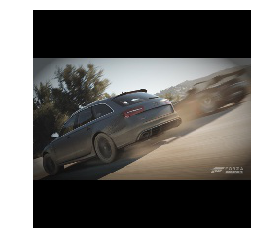

In [7]:
img_name = rng.choice(nonemergency_vehicles)

img = imread(img_name)

pylab.imshow(img)
pylab.axis('off')
pylab.show()

In [8]:
images = []
for img_loc in data.images:
    img = image.load_img('../datasets/emergency_classification/' + img_loc, target_size=(100, 100))
    img = image.img_to_array(img)
    images.append(img)
    
images=np.array(images)

In [9]:
images.shape

(2352, 100, 100, 3)

In [10]:
train_x = images.reshape(2352, 100*100*3)

In [11]:
train_x /= train_x.max()

In [12]:
train_y = data.emergency_or_not.values

In [13]:
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.3, random_state=42)

In [15]:
model=Sequential()

model.add(Dense(1024, input_dim=100*100*3, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1024)              30721024  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1025      
Total params: 30,722,049
Trainable params: 30,722,049
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(X_train, Y_train, epochs=60, batch_size=128,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/60
1646/1646 [==============================] - 2s 1ms/step - loss: 1.9878 - acc: 0.6051 - val_loss: 0.6042 - val_acc: 0.6912
Epoch 2/60
1646/1646 [==============================] - 0s 279us/step - loss: 0.5784 - acc: 0.7169 - val_loss: 0.5940 - val_acc: 0.6898
Epoch 3/60
1646/1646 [==============================] - 0s 274us/step - loss: 0.5658 - acc: 0.7339 - val_loss: 0.5906 - val_acc: 0.6941
Epoch 4/60
1646/1646 [==============================] - 0s 295us/step - loss: 0.5506 - acc: 0.7412 - val_loss: 0.5832 - val_acc: 0.7011
Epoch 5/60
1646/1646 [==============================] - 0s 296us/step - loss: 0.5470 - acc: 0.7351 - val_loss: 0.5871 - val_acc: 0.7054
Epoch 6/60
1646/1646 [==============================] - 0s 301us/step - loss: 0.5358 - acc: 0.7479 - val_loss: 0.5729 - val_acc: 0.7068
Epoch 7/60
1646/1646 [==============================] - 0s 289us/step - loss: 0.5237 - acc: 0.7570 - val_loss: 0.5684 - val_acc: 0.7082
Epo

1646/1646 [==============================] - 1s 313us/step - loss: 0.0523 - acc: 0.9945 - val_loss: 0.6644 - val_acc: 0.7649


In [18]:
predictions = model.predict_classes(X_valid).ravel()
prediction_probabilities = model.predict(X_valid).ravel()
all_vehicles = np.array(emergency_vehicles + nonemergency_vehicles)

_, valid_vehicles, _, valid_y = train_test_split(all_vehicles,train_y,test_size=0.3, random_state=42)

3 % sure that it is emergency


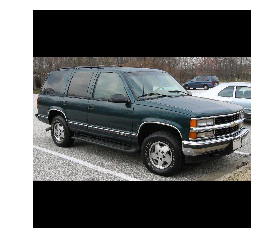

In [19]:
correct_predictions = valid_vehicles[predictions == Y_valid]

index = rng.choice(range(len(correct_predictions)))
img_name = correct_predictions[index]


prob = (prediction_probabilities[predictions == Y_valid] * 100).astype(int)[index]

img = imread(img_name)

print(prob , '% sure that it is emergency')
pylab.imshow(img)
pylab.axis('off')
pylab.show()

98 % sure that it is emergency


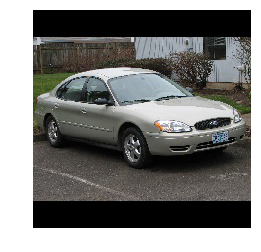

In [20]:
incorrect_predictions = valid_vehicles[predictions != Y_valid]
index = rng.choice(range(len(incorrect_predictions)))
img_name = incorrect_predictions[index]


prob = (prediction_probabilities[predictions != Y_valid] * 100).astype(int)[index]

img = imread(img_name)

print(prob , '% sure that it is emergency')
pylab.imshow(img)
pylab.axis('off')
pylab.show()